In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_excel('/content/iris.xls')

In [73]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [76]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[]

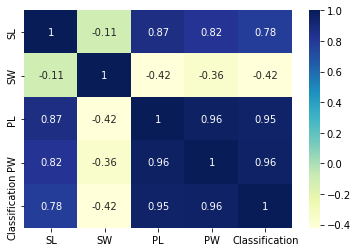

In [77]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cmap='YlGnBu')
plt.plot()

In [78]:
x = data.drop('Classification', axis = 1)

In [79]:
y = data['Classification']

In [80]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train, y_train)


In [82]:
y_pred = log_model.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [84]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, y_pred))
print('Accuracy is : ', accuracy_score(y_test, y_pred))

Confusion Matrix is :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy is :  1.0


# **KNN**

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
metric_k = []
neighbors = np.arange(3,15)

In [87]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(x_train, y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

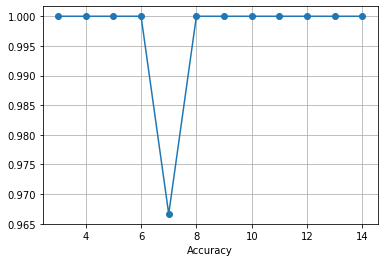

In [88]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel("K-Value")
plt.xlabel("Accuracy")
plt.grid()

In [89]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=11,metric='euclidean')
  classifier.fit(x_train, y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

In [90]:
print('Confusion Matrix is :', confusion_matrix(y_test, y_predictions))
print('Accuracy is :', accuracy_score(y_test, y_predictions))

Confusion Matrix is : [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy is : 1.0


what if neighbor size is 7...!!?

In [91]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
  classifier.fit(x_train, y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

In [92]:
print('Confusion Matrix is :', confusion_matrix(y_test, y_predictions))
print('Accuracy is :', accuracy_score(y_test, y_predictions))

Confusion Matrix is : [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy is : 0.9666666666666667


Why??

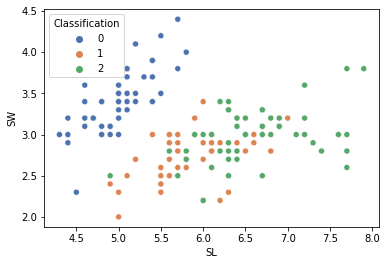

In [97]:
sns.scatterplot(data=data, x="SL", y="SW", hue="Classification", palette="deep")
plt.show()

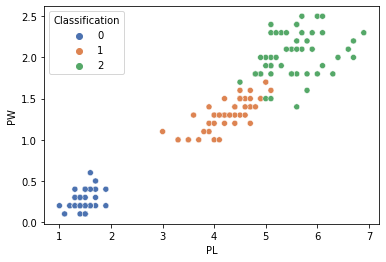

In [98]:
sns.scatterplot(data=data, x="PL", y="PW", hue="Classification", palette="deep")
plt.show()

May be since cat 1 and cat 2 are a bit mixed up in the middle and when neighbor becomes 7 the classification gets disrupted.(Both in case of Sepels and Petals)

## SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svm_cl = SVC(kernel='linear')
svm_cl = svm_cl.fit(x_train, y_train)
svm_pred = svm_cl.predict(x_test)


In [62]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, svm_pred))
print('Accuracy is :', accuracy_score(y_test, svm_pred))

Confusion Matrix is :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy is : 1.0


In [63]:
svm_cl1 = SVC(kernel='rbf')
svm_cl1 = svm_cl1.fit(x_train, y_train)
svm_pred1 = svm_cl1.predict(x_test)

In [64]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, svm_pred1))
print('Accuracy is :', accuracy_score(y_test, svm_pred1))

Confusion Matrix is :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy is : 1.0


## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train, y_train)
dt_pred = dt_cls.predict(x_test)

In [67]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, dt_pred))
print('Accuracy is :', accuracy_score(y_test, dt_pred))

Confusion Matrix is :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy is : 1.0


#Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train, y_train)
rf_pred = rf_cls.predict(x_test)

In [70]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, rf_pred))
print('Accuracy is :', accuracy_score(y_test, rf_pred))

Confusion Matrix is :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy is : 1.0
